## Marlon Selvi

In [3]:
import numpy as np
from typing import List, Union 
import matplotlib.pyplot as plt



$$ \int_{1}^{5} \frac{25}{x^2} \, dx = 20
$$

<center>In this notebook, I explore various numerical approximation techniques. These methods are useful for estimating the area under a curve without using traditional integration.</center>


<h1 style="text-align: center;font-size: 40px">Midpoint Interpolation</h1>

$$ \int_a^b f(x) \, dx \approx (b - a) \, f\left( \frac{a+b}{2} \right)$$

In [4]:
real_val = 20
def fnc(x):
    return np.divide(25, x**2)

In [5]:
def Midpoint(fnc, a, b, n) -> float:
    h = (b - a) / n
    ys = []
    for i in range(n):
        x_0 = (a + (i * h))
        x_1 = (a + ((i + 1) * h))
        mid = (x_0 + x_1) / 2
        y = fnc(mid)
        ys.append(y)
    return h * np.sum(ys)
    
        
        

In [6]:
approx = Midpoint(fnc, 1, 5, 1000)
print(f" Midpoint Approximation: {approx} \n Actual Error: {abs(real_val - approx)}")

 Midpoint Approximation: 19.999966933519936 
 Actual Error: 3.3066480064292136e-05



<h1 style="text-align: center;font-size: 40px">Trapezoid Interpolation</h1>

$$\int_a^b f(x) \, dx \approx \frac{h}{2} \left( f(x_0) + 2f(x_1) + 2f(x_2) + \cdots + 2f(x_{n-1}) + f(x_n) \right)$$


In [7]:
def Trapezoid(fnc, a, b, n):
    h = (b - a) / n
    ys = []
    x_0 = a
    
    for i in range(1,n):
        x_i = x_0 + (i * h)
        y = 2 * fnc(x_i)
        ys.append(y)
        
    ys.extend([fnc(a), fnc(b)])
    ys = np.multiply(ys, h/2)

    return np.sum(ys)
        
        

In [8]:
approx = Trapezoid(fnc, 1, 5, 1000)
print(f" Trapezoid Approximation: {approx} \n Actual Error: {abs(real_val - approx)}")

 Trapezoid Approximation: 20.000066133120068 
 Actual Error: 6.613312006820138e-05


<h1 style="text-align: center;font-size: 40px">Simpsons Interpolation</h1>

$$ \int_a^b f(x) \, dx \approx \frac{h}{3} \left( f(x_0) + 4f(x_1) + 2f(x_2) + \cdots + 2f(x_{n-2}) + 4f(x_{n-1}) + f(x_n) \right) $$


In [9]:
def Simpsons(fnc, a, b, n):
    h = (b - a) / n 
    ys = []
    x_0 = a

    for i in range(1,n):
        x_i = x_0 + (i * h)
        if (i % 2 == 0):
            y = 2 * fnc(x_i)
        else:
            y = 4 * fnc(x_i)
        ys.append(y)
    ys.extend([fnc(a), fnc(b)])
    ys = np.multiply(ys, h/3)
    return np.sum(ys)
    

In [10]:
approx = Simpsons(fnc, 1, 5, 1000)
print(f" Simpsons Approximation: {approx} \n Actual Error: {abs(real_val - approx)}")

 Simpsons Approximation: 20.00000000085301 
 Actual Error: 8.530101069936791e-10


<h1 style="text-align: center;font-size: 40px">Gaussian Quadrature</h1>



$$
\int_a^b f(x) \, dx \approx \frac{b-a}{2} \sum_{i=1}^n w_i \, f\left( \frac{b-a}{2} x_i + \frac{a+b}{2} \right)
$$
<center>Gaussian Quadrature uses set weights and abscissae to approximate.</center>



In [11]:
weights = {}

In [12]:
weights[1] = [2.0]

weights[2] = [
    1.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000,
    1.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
]

weights[3] = [
    0.8888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888889,
    0.5555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555556,
    0.5555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555556
]

weights[4] = [
    0.6521451548625461426269360507780005927646513041661064595074706804812481325340896482780162322677418404902018960952364978455755577496740182191429757016783303751407135229556360801973666260481564013273531860737119707353160256000107787211587578617532049337456560923057986412084590467808124974086,
    0.6521451548625461426269360507780005927646513041661064595074706804812481325340896482780162322677418404902018960952364978455755577496740182191429757016783303751407135229556360801973666260481564013273531860737119707353160256000107787211587578617532049337456560923057986412084590467808124974086,
    0.3478548451374538573730639492219994072353486958338935404925293195187518674659103517219837677322581595097981039047635021544244422503259817808570242983216696248592864770443639198026333739518435986726468139262880292646839743999892212788412421382467950662543439076942013587915409532191875025701,
    0.3478548451374538573730639492219994072353486958338935404925293195187518674659103517219837677322581595097981039047635021544244422503259817808570242983216696248592864770443639198026333739518435986726468139262880292646839743999892212788412421382467950662543439076942013587915409532191875025701
]

weights[5] = [
    0.5688888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888889,
    0.4786286704993664680412915148356381929122955533431415399727276673338382671525124569755621250616041107794464209474122299742927901670531874220236019762755381069981020199559708433435017355341690324695622104863536721598859262913644828482640505637133513606531929893286127565185389732581634388813,
    0.4786286704993664680412915148356381929122955533431415399727276673338382671525124569755621250616041107794464209474122299742927901670531874220236019762755381069981020199559708433435017355341690324695622104863536721598859262913644828482640505637133513606531929893286127565185389732581634388813,
    0.2369268850561890875142640407199173626432600022124140155828278882217172884030430985799934304939514447761091346081433255812627653885023681335319535792800174485574535355995847122120538200213865230859933450692018833956696292641910727072915049918422041949023625662269427990370165822973921166843,
    0.2369268850561890875142640407199173626432600022124140155828278882217172884030430985799934304939514447761091346081433255812627653885023681335319535792800174485574535355995847122120538200213865230859933450692018833956696292641910727072915049918422041949023625662269427990370165822973921166843
]

weights[6] = [
    0.3607615730481386075698335138377161116615218927467454822897392402371400378372617183209622019888193479431172091403707985898798902783643210707767872114085818922114502722525757771126000732368828591631602895111800517408136855470744824724861011832599314498172164024255867775267681999309503106873150514997832,
    0.3607615730481386075698335138377161116615218927467454822897392402371400378372617183209622019888193479431172091403707985898798902783643210707767872114085818922114502722525757771126000732368828591631602895111800517408136855470744824724861011832599314498172164024255867775267681999309503106873150514997832,
    0.4679139345726910473898703439895509948116556057692105353116253199639142016203981270311100925847919823047662687897547971009283625541735029545935635592733866593364825926382559018030281273563502536241704619318259000997569870959005334740800746343768244318081732063691741034162617653462927888917150514997832,
    0.4679139345726910473898703439895509948116556057692105353116253199639142016203981270311100925847919823047662687897547971009283625541735029545935635592733866593364825926382559018030281273563502536241704619318259000997569870959005334740800746343768244318081732063691741034162617653462927888917150514997832,
    0.1713244923791703450402961421727328935268225014840439823986354397989457605423401546479277054263886697521165220698744043091917471674621759746296492293180314484520671351091683210843717994067668872126692485569940481594293273570249840534338241823632441183746103912052391190442197035702977497812150514997832,
    0.1713244923791703450402961421727328935268225014840439823986354397989457605423401546479277054263886697521165220698744043091917471674621759746296492293180314484520671351091683210843717994067668872126692485569940481594293273570249840534338241823632441183746103912052391190442197035702977497812150514997832
]

weights[7] = [
    0.4179591836734693877551020408163265306122448979591836734693877551020408163265306122448979591836734693877551020408163265306122448979591836734693877551020408163265306122448979591836734693877551020408163265306122448979591836734693877551020408163265306122448979591836734693877551020408163265306,
    0.3818300505051189449503697754889751338783650835338627347510834510307055464341297083486846593440448014503146717645853573344928956776383837562443187566373816994263513750309425122069048082192405967657155458166140211350441276674773890998286086501179973611850420964132316867109449892362441359044150514997832,
    0.3818300505051189449503697754889751338783650835338627347510834510307055464341297083486846593440448014503146717645853573344928956776383837562443187566373816994263513750309425122069048082192405967657155458166140211350441276674773890998286086501179973611850420964132316867109449892362441359044150514997832,
    0.2797053914892766679014677714237795824869250652265987645370140326936188104305626768132409429011976187663233752133720515191356369795631199443713526578123368545563592025336909192643194833502493348267909279642862302108156020621692804889667628308214167200738365553989662119973317061306305537859150514997832,
    0.2797053914892766679014677714237795824869250652265987645370140326936188104305626768132409429011976187663233752133720515191356369795631199443713526578123368545563592025336909192643194833502493348267909279642862302108156020621692804889667628308214167200738365553989662119973317061306305537859150514997832,
    0.1294849661688696932706114326790820183285874022599466639772086387246552349720423087156254181629208450894844020016344278810653448938189044626496347079992610378540241163129175889369389737366325173870853629537936262051606784336186365336536081108973206126186723685959653665979209749176350897029150514997832,
    0.1294849661688696932706114326790820183285874022599466639772086387246552349720423087156254181629208450894844020016344278810653448938189044626496347079992610378540241163129175889369389737366325173870853629537936262051606784336186365336536081108973206126186723685959653665979209749176350897029150514997832
]

weights[8] = [
    0.3626837833783619829651504492771956121941460398943305405248230675666867347239066773243660420848285095502587699262967065529258215569895173844995576007862076842778350382862546305771007553373269714714894268328780431822779077846722965535548199601402487767505928976560993309027632737537826127502150514997832,
    0.3626837833783619829651504492771956121941460398943305405248230675666867347239066773243660420848285095502587699262967065529258215569895173844995576007862076842778350382862546305771007553373269714714894268328780431822779077846722965535548199601402487767505928976560993309027632737537826127502150514997832,
    0.3137066458778872873379622019866013132603289990027349376902639450749562719421734969616980762339285560494275746410778086162472468322655616056890624276469758994622503118776562559463287222021520431626467794721603822601295276898652509723185157998353156062419751736972560423953923732838789657919150514997832,
    0.3137066458778872873379622019866013132603289990027349376902639450749562719421734969616980762339285560494275746410778086162472468322655616056890624276469758994622503118776562559463287222021520431626467794721603822601295276898652509723185157998353156062419751736972560423953923732838789657919150514997832,
    0.2223810344533744705443559944262408844301308700512495647259092892936168145704490408536531423771979278421592661012122181231114375798525722419381826674532090577908613289536840402789398648876004385697202157482063253247195590228631570651319965589733545440605952819880671616779621183704306688233150514997832,
    0.2223810344533744705443559944262408844301308700512495647259092892936168145704490408536531423771979278421592661012122181231114375798525722419381826674532090577908613289536840402789398648876004385697202157482063253247195590228631570651319965589733545440605952819880671616779621183704306688233150514997832,
    0.1012285362903762591525313543099621901153940910516849570590036980647401787634707848602827393040450065581543893314132667077154940308923487678731973041136073584690533208824050731976306575729205467961435779467552492328730055025992954089946676810510810729468366466585774650346143712142008566866150514997832,
    0.1012285362903762591525313543099621901153940910516849570590036980647401787634707848602827393040450065581543893314132667077154940308923487678731973041136073584690533208824050731976306575729205467961435779467552492328730055025992954089946676810510810729468366466585774650346143712142008566866150514997832
]

weights[9] = [
    0.3302393550012597631645250692869740488788107835726883345930964978584026203073822121441169060216679264298311917359536407155454774502393550012597631645250692869740488788107835726883345930964978584026203073822121441169060216679264298311917359536407155454774502393550012597631645250692869740489,
    0.1806481606948574040584720312429128095143378217320404844983359064713572905449462697645949773031997041476074679602577937226796268460630127231790100804745577374812973964868278705556370432288860477148539230329025541102198218481213990057413494800065234875808239968200871271576666111786816983312150514997832,
    0.1806481606948574040584720312429128095143378217320404844983359064713572905449462697645949773031997041476074679602577937226796268460630127231790100804745577374812973964868278705556370432288860477148539230329025541102198218481213990057413494800065234875808239968200871271576666111786816983312150514997832,
    0.081274388361574411971892158110523650675661720782410750711107676880686686308452062945578554702942576957794073317963038094590048795093955759528141378844750853767333972349567507324558127938133868301667395157245896802611234739695631672003334674766636592975299135275084311484994311087346192507215051499783203,
    0.081274388361574411971892158110523650675661720782410750711107676880686686308452062945578554702942576957794073317963038094590048795093955759528141378844750853767333972349567507324558127938133868301667395157245896802611234739695631672003334674766636592975299135275084311484994311087346192507215051499783203,
    0.3123470770400028400686304065844436655987548612619046455540111655991438973240193165701219218880063538522954773181646973116391818098875271459600370901478405885572589090757645984059641355722376816546561522245422024969266380802745127735793790292136245228820749357799614002097074181144513901973150514997832,
    0.3123470770400028400686304065844436655987548612619046455540111655991438973240193165701219218880063538522954773181646973116391818098875271459600370901478405885572589090757645984059641355722376816546561522245422024969266380802745127735793790292136245228820749357799614002097074181144513901973150514997832,
    0.2606106964029354623187428694186328497718402044372999519399970021196108156688912446476460930950174018273873855356376505133184038238358268707029298682703161767070852826824482373696733967124934731275123758942032745317892944979452416330800688391928576238230768124473665313152599422632809847998150514997832,
    0.2606106964029354623187428694186328497718402044372999519399970021196108156688912446476460930950174018273873855356376505133184038238358268707029298682703161767070852826824482373696733967124934731275123758942032745317892944979452416330800688391928576238230768124473665313152599422632809847998150514997832
]

weights[10] = [
    0.295524224714752870173892994651338329421046717026853601354308029755995938217152329270356595793754216722717164401252558386818490789552005826001936342494186966609562718648884168043231305061535867409083051270663865287483901746874726597515954450775158914556548308329986393605934912382356670244,
    0.295524224714752870173892994651338329421046717026853601354308029755995938217152329270356595793754216722717164401252558386818490789552005826001936342494186966609562718648884168043231305061535867409083051270663865287483901746874726597515954450775158914556548308329986393605934912382356670244,
    0.2692667193099963550912269215694693528597599384608837958005632762421534323191792767642266367092527607555958114503686983086929234693811452415564658846634423711656014432259960141729044528030344411297902977067142537534806284608399276575006911686749842814086288868533208042150419508881916391898,
    0.2692667193099963550912269215694693528597599384608837958005632762421534323191792767642266367092527607555958114503686983086929234693811452415564658846634423711656014432259960141729044528030344411297902977067142537534806284608399276575006911686749842814086288868533208042150419508881916391898,
    0.2190863625159820439955349342281631924587718705226770898809565436351999106529512812426839931772021927865912168728128876347666269080669475688309211843316656677105269915322077536772652826671027878246851010208832173320064273483254756250668415885349420711613410227291565477768928313300688702802,
    0.2190863625159820439955349342281631924587718705226770898809565436351999106529512812426839931772021927865912168728128876347666269080669475688309211843316656677105269915322077536772652826671027878246851010208832173320064273483254756250668415885349420711613410227291565477768928313300688702802,
    0.1494513491505805931457763396576973324025566396694273678354772687532386547266300109459472646347319519140057525610454363382344517067454976014713716011937109528798134828865118770953566439639333773939909201690204649083815618779157522578300343427785361756927642128792412282970150172590842897331,
    0.1494513491505805931457763396576973324025566396694273678354772687532386547266300109459472646347319519140057525610454363382344517067454976014713716011937109528798134828865118770953566439639333773939909201690204649083815618779157522578300343427785361756927642128792412282970150172590842897331,
    0.066671344308688137593568809893331792857864834320158145128694881613412064084087101776785509685058877821090054714520419331487507126254403762139304987316994041634495363706400187011242315504393526242450629832718198718647480566044117862086478449236378557180717569208295026105115288152794421677,
    0.066671344308688137593568809893331792857864834320158145128694881613412064084087101776785509685058877821090054714520419331487507126254403762139304987316994041634495363706400187011242315504393526242450629832718198718647480566044117862086478449236378557180717569208295026105115288152794421677
]

weights[11] = [
    0.2729250867779006307144835283363421891560419698947837475976004114532253060391588530116668644807172945701084229222757361285499813638341776869915398053926192454330982469510608038746566885095023623162151300679439207577735716263854791993320131848270376408904547432685960824488963017101545240073,
    0.2628045445102466621806888698905091953727646776031445563800553714855128033395452535524169970170267059591323352348905685930815659959388220486516662277122153406007564563422288846814246265117197586291110715875175614041126916826846274452615523702086591000201133611607179097990732517786141292028,
    0.2628045445102466621806888698905091953727646776031445563800553714855128033395452535524169970170267059591323352348905685930815659959388220486516662277122153406007564563422288846814246265117197586291110715875175614041126916826846274452615523702086591000201133611607179097990732517786141292028,
    0.2331937645919904799185237048431751394317981723169585090273197221219322132188809959540399484382616844165511091916787318112920150795060810133433603801373897814912101090002545933770716225731073421081441218793246900837233861267889573966809233425723055956467735751888062574046043468313611332881,
    0.2331937645919904799185237048431751394317981723169585090273197221219322132188809959540399484382616844165511091916787318112920150795060810133433603801373897814912101090002545933770716225731073421081441218793246900837233861267889573966809233425723055956467735751888062574046043468313611332881,
    0.1862902109277342514260976414316558916912847480402034117815064041738723480087855024693307585179795861311009645389663354315618171782985952444059876613187869462456124841903168186981083148555168528511284378808837151240596308699896596151043118276873358853174012590644772948200410345821126889686,
    0.1862902109277342514260976414316558916912847480402034117815064041738723480087855024693307585179795861311009645389663354315618171782985952444059876613187869462456124841903168186981083148555168528511284378808837151240596308699896596151043118276873358853174012590644772948200410345821126889686,
    0.1255803694649046246346942992239401001976157913954035006639340108179145751324712776346876417140545303978650585450845219359841068839377506073290884347363756769005925474627589346055152226465992230909984623296951248837188959879470592809528962736823949327704509072540524563398665677063470369886,
    0.1255803694649046246346942992239401001976157913954035006639340108179145751324712776346876417140545303978650585450845219359841068839377506073290884347363756769005925474627589346055152226465992230909984623296951248837188959879470592809528962736823949327704509072540524563398665677063470369886,
    0.0556685671161736664827537204425485787285156256968981483483842856741554072807375438836912220723188458102963210282419741638055041804016622427741273933989226320452792795289103667005518691583056421625103412886069481254986095193969566623343095934357856658000335256976480404119666482269782141718,
    0.0556685671161736664827537204425485787285156256968981483483842856741554072807375438836912220723188458102963210282419741638055041804016622427741273933989226320452792795289103667005518691583056421625103412886069481254986095193969566623343095934357856658000335256976480404119666482269782141718
]

weights[12] = [
    0.2491470458134027850005624360429512108304609025696188313953510031162794274572880430311568006180423530648334761178771858330585110736036496880396421037700854294150273722109172825701968430164659192402161982079625520732434085776613788579662540329347837170742904111565650371846972323325015720931,
    0.2491470458134027850005624360429512108304609025696188313953510031162794274572880430311568006180423530648334761178771858330585110736036496880396421037700854294150273722109172825701968430164659192402161982079625520732434085776613788579662540329347837170742904111565650371846972323325015720931,
    0.2334925365383548087608498989248780562594099721997548747305234978214920000794116752806790265085636904667387564397088688338985427884089160966197503884738075353324814517948875038881216279280304248959830878229357729079164423103001879530654707315375809270840669989018891281956753131165193423269,
    0.2334925365383548087608498989248780562594099721997548747305234978214920000794116752806790265085636904667387564397088688338985427884089160966197503884738075353324814517948875038881216279280304248959830878229357729079164423103001879530654707315375809270840669989018891281956753131165193423269,
    0.203167426723065921749064455809798376506518147274590146398594565797645632510472843795144395064605232431160429336863259964961371351902101329079104201895994236856568902452607382802768524457038466812400647581340638998753052152617280593445415722327927963339557545261423500783899286052850767594,
    0.203167426723065921749064455809798376506518147274590146398594565797645632510472843795144395064605232431160429336863259964961371351902101329079104201895994236856568902452607382802768524457038466812400647581340638998753052152617280593445415722327927963339557545261423500783899286052850767594,
    0.1600783285433462263346525295433590718720117304908641779098995441579542251732911506816565526370577305270748770968128026272437638608826490446750310024340951121367986902065997927856009804637591399838724493887258633605906166774286382455298444870458396283884610940466728874776625823124924247387,
    0.1600783285433462263346525295433590718720117304908641779098995441579542251732911506816565526370577305270748770968128026272437638608826490446750310024340951121367986902065997927856009804637591399838724493887258633605906166774286382455298444870458396283884610940466728874776625823124924247387,
    0.1069393259953184309602547181939962242145701734703248800051260421028189936274975765405373180963164574135763593331411441611703305169635508448480086523269196005011439044764920482935551535857607910705249218071033795470424895712830930967806467598358517298903536137451828089012822811396588037254,
    0.1069393259953184309602547181939962242145701734703248800051260421028189936274975765405373180963164574135763593331411441611703305169635508448480086523269196005011439044764920482935551535857607910705249218071033795470424895712830930967806467598358517298903536137451828089012822811396588037254,
    0.0471753363865118271946159614850170603170290739948470895605053470038097211520387106708259070754145360966161016755967385796674804082391329967384636510990980857579796788584959896597568705489452579970026951919317931124539907107094212532123682663180160342232703368882666374567833050364187887189,
    0.0471753363865118271946159614850170603170290739948470895605053470038097211520387106708259070754145360966161016755967385796674804082391329967384636510990980857579796788584959896597568705489452579970026951919317931124539907107094212532123682663180160342232703368882666374567833050364187887189
]

weights[13] = [
    0.2325515532308739101945895152688359481566274773067979861186654393447600240807034013827220620427413634206841000047793254586461379668172874966081759288552495345702138908932115725322518529311736104942898149691356484563277770070976864183657390450597243804037010830217623424416631209838003044796,
    0.2262831802628972384120901860397766184347577376155570198649685487715756631204999710418263186663139297211265889107526836426557968078763428902495438151872023237441066027256935875147140517861161869397608640950846733738986712351672898382114993485440591169613748948922640415655895437609919445534,
    0.2262831802628972384120901860397766184347577376155570198649685487715756631204999710418263186663139297211265889107526836426557968078763428902495438151872023237441066027256935875147140517861161869397608640950846733738986712351672898382114993485440591169613748948922640415655895437609919445534,
    0.2078160475368885023125232193060527633865826091995035492191111199165385435650844322605955280466119265759826407051690728416782631246877699599858929066196711949483587279475686942430824453897384184449472747677348480606120504898296573235877308239374369727851300594814230840467881711421900661897,
    0.2078160475368885023125232193060527633865826091995035492191111199165385435650844322605955280466119265759826407051690728416782631246877699599858929066196711949483587279475686942430824453897384184449472747677348480606120504898296573235877308239374369727851300594814230840467881711421900661897,
    0.1781459807619457382800466919960979955128126506610165029867944402891450694987487234947169512223127015069670497200743946097834883241893874241917617416603387078399445321976924996760290699777029401220398372429953593454578073073328073351761308253696219117811497432878451113282968179717189979188,
    0.1781459807619457382800466919960979955128126506610165029867944402891450694987487234947169512223127015069670497200743946097834883241893874241917617416603387078399445321976924996760290699777029401220398372429953593454578073073328073351761308253696219117811497432878451113282968179717189979188,
    0.138873510219787238463601776868871467621862718263298227646355016505772521534889535725181542854605625862409684276125989931583961822392400056140349181450224581984204381964332335793784634023652926657148198489192428511473342464680175442836266082110093820312115079812730984876934297728295818834,
    0.138873510219787238463601776868871467621862718263298227646355016505772521534889535725181542854605625862409684276125989931583961822392400056140349181450224581984204381964332335793784634023652926657148198489192428511473342464680175442836266082110093820312115079812730984876934297728295818834,
    0.0921214998377284479144217759537971209236839998622368390883915473395937297276329262918978157557319728688464206180281115405280755822061330132575025454931122799528778263378580260096595447239712476272992175052866998048878792306641975965562093757627202951860014882629364182187061210206786185036,
    0.0921214998377284479144217759537971209236839998622368390883915473395937297276329262918978157557319728688464206180281115405280755822061330132575025454931122799528778263378580260096595447239712476272992175052866998048878792306641975965562093757627202951860014882629364182187061210206786185036,
    0.0404840047653158795200215922009860600419865457449888681350466075049944605127927104944208124330531617543255657674600847044473453552393229078708618451618261442454009833802490704966043276332314749616597004151381666755063607687770292544492940217462056927723781927519191887428534879952917444979,
    0.0404840047653158795200215922009860600419865457449888681350466075049944605127927104944208124330531617543255657674600847044473453552393229078708618451618261442454009833802490704966043276332314749616597004151381666755063607687770292544492940217462056927723781927519191887428534879952917444979
]

weights[14] = [
    0.215263853463157790195876443316260035274997558054128800219776392543618787353994604001024441410819578237256672332436770992948165976464930189035601908050981428041757802691565082287626417365449192946281203662033345376460522564310634412912654698349487266562730897512393716549425155133887783267,
    0.215263853463157790195876443316260035274997558054128800219776392543618787353994604001024441410819578237256672332436770992948165976464930189035601908050981428041757802691565082287626417365449192946281203662033345376460522564310634412912654698349487266562730897512393716549425155133887783267,
    0.2051984637212956039659240656612180557103390613094194517168972902833671448252497203394318399918908957243692694424494287284534856133850644865918702302140316671417873329934748278391381113256848128254396760209050529765354249731237553251469192851898072394707049964721031773292256965337005468577,
    0.2051984637212956039659240656612180557103390613094194517168972902833671448252497203394318399918908957243692694424494287284534856133850644865918702302140316671417873329934748278391381113256848128254396760209050529765354249731237553251469192851898072394707049964721031773292256965337005468577,
    0.1855383974779378137417165901251570362489226029373316590200349250690983502635254444255527311467122229825611215057289188990778964974252160895085525241528364360728640406002723237969714138507534560933312278904499388523844853663939226179218798247606150274514935557012909889503067356410067833406,
    0.1855383974779378137417165901251570362489226029373316590200349250690983502635254444255527311467122229825611215057289188990778964974252160895085525241528364360728640406002723237969714138507534560933312278904499388523844853663939226179218798247606150274514935557012909889503067356410067833406,
    0.1572031671581935345696019386238421566056680373373233749693170438747681763696082985139580933624180762768531519990811885018854374920646576267489242910372646019870010221956474591078423228056106861169077132184669351601383774428385022658899238684439084685022864905124096570215866733146092008329,
    0.1572031671581935345696019386238421566056680373373233749693170438747681763696082985139580933624180762768531519990811885018854374920646576267489242910372646019870010221956474591078423228056106861169077132184669351601383774428385022658899238684439084685022864905124096570215866733146092008329,
    0.1215185706879031846894148090724766259566693456900746722910753925431597438925264923188199062703750071489155506530592569942811574313408868548096421257144546080289185410615420786200564675456293296025406102396367179854059007550049729049892410130191072357341821083329663867464821867539341968434,
    0.1215185706879031846894148090724766259566693456900746722910753925431597438925264923188199062703750071489155506530592569942811574313408868548096421257144546080289185410615420786200564675456293296025406102396367179854059007550049729049892410130191072357341821083329663867464821867539341968434,
    0.0801580871597602098056332770628543095836977853945947652013990654895714744572871698635361908191377559686225015908038847487953091382572604434376755119844740947797387723700536610577178522653954549123135546624971159464576653576521600937489354127710937535198838649279475628473516378736712929573,
    0.0801580871597602098056332770628543095836977853945947652013990654895714744572871698635361908191377559686225015908038847487953091382572604434376755119844740947797387723700536610577178522653954549123135546624971159464576653576521600937489354127710937535198838649279475628473516378736712929573,
    0.0351194603317518630318328761381917806197056092771272765814998901964163228378082705376767969986464636614217324764405511345585478510619843098677334088459571639479324880874445672906474148414770675031860143060108937026176235406760523793904458974659810087587180865408885105556219147609526200925,
    0.0351194603317518630318328761381917806197056092771272765814998901964163228378082705376767969986464636614217324764405511345585478510619843098677334088459571639479324880874445672906474148414770675031860143060108937026176235406760523793904458974659810087587180865408885105556219147609526200925
]

weights[15] = [
    0.2025782419255612728806201999675193148386621580094773567967041160514353987547460740933934407127880321353514826708299901773095246288719482192675665869139062612256085449558643031836505029978223451416924610397803870997344190817384290577763771236964710158183351656545129738602932076125549319023,
    0.1984314853271115764561183264438393248186925599575419934847379279291247975334342681333149991648178232076602085488930991764791477591610421132086613599988857531192702426415927231327044667892816045834098228729517385124172569721507734356429605231973280268604684028301488322765670316796303356288,
    0.1984314853271115764561183264438393248186925599575419934847379279291247975334342681333149991648178232076602085488930991764791477591610421132086613599988857531192702426415927231327044667892816045834098228729517385124172569721507734356429605231973280268604684028301488322765670316796303356288,
    0.1861610000155622110268005618664228245062260122779284028154957273100132555026991606189497688860993236053997770900138443530672702173881822218913650817524402394454633498455254983854987704558698346743823005532094467225041792102166969649720014347260039240685291809910280840226841347980521837134,
    0.1861610000155622110268005618664228245062260122779284028154957273100132555026991606189497688860993236053997770900138443530672702173881822218913650817524402394454633498455254983854987704558698346743823005532094467225041792102166969649720014347260039240685291809910280840226841347980521837134,
    0.1662692058169939335532008604812088111309001800984129073218651905635535632122785177107051742924155362148446154065718522274181714630170967754925174671836098206991229223858649637789999954737644311199247756973750854153289068732761392073165357013373138619425638694563391801926576061195937788699,
    0.1662692058169939335532008604812088111309001800984129073218651905635535632122785177107051742924155362148446154065718522274181714630170967754925174671836098206991229223858649637789999954737644311199247756973750854153289068732761392073165357013373138619425638694563391801926576061195937788699,
    0.1395706779261543144478047945110283225208502753155112432023911286310884445419078116807682573635713336381490888932766399041110917245491409628233342406440126372784794505759941197273360771302835643088631984018181469133646430155458101237375718557827299435854832981132499961239407405172041096534,
    0.1395706779261543144478047945110283225208502753155112432023911286310884445419078116807682573635713336381490888932766399041110917245491409628233342406440126372784794505759941197273360771302835643088631984018181469133646430155458101237375718557827299435854832981132499961239407405172041096534,
    0.1071592204671719350118695466858693034155437157581019806870223891218779948523157997256858571376086240443980876783750555812718104988405678239974708278615361621323837150901155489565006064488581094283683146572762126337955710255509976788374176850005859153689529410495091691306303339254292612609,
    0.1071592204671719350118695466858693034155437157581019806870223891218779948523157997256858571376086240443980876783750555812718104988405678239974708278615361621323837150901155489565006064488581094283683146572762126337955710255509976788374176850005859153689529410495091691306303339254292612609,
    0.0703660474881081247092674164506673384667080327543307198259072929143870555128742370448404520666939392193554898585950405388046148432772910792956556041537582479070968902376133780797668535183637426522389065978826221602778581837148625124153563760247327246091136423557230784075321996037169475438,
    0.0703660474881081247092674164506673384667080327543307198259072929143870555128742370448404520666939392193554898585950405388046148432772910792956556041537582479070968902376133780797668535183637426522389065978826221602778581837148625124153563760247327246091136423557230784075321996037169475438,
    0.0307532419961172683546283935772044177217481448334340742642282855042371894671171680390387707323994040025169911888594731301931311793307049136572121249488040088053791567453616163473679786846675406619664506995965540924443751786755055481899678620830700956557210823767451729158413495735272185295,
    0.0307532419961172683546283935772044177217481448334340742642282855042371894671171680390387707323994040025169911888594731301931311793307049136572121249488040088053791567453616163473679786846675406619664506995965540924443751786755055481899678620830700956557210823767451729158413495735272185295
]

In [13]:
abscissae = {}

In [14]:
abscissae[1] = [0]
abscissae[2] = [
    -0.5773502691896257645091487805019574556476017512701268760186023264839776723029333456937153955857495252252087138051355676766566483649996508262705518373647912161760310773007685273559916067003615583077550051041144223011076288835574182229739459904090157105534559538626730166621791266197964892168,
    0.5773502691896257645091487805019574556476017512701268760186023264839776723029333456937153955857495252252087138051355676766566483649996508262705518373647912161760310773007685273559916067003615583077550051041144223011076288835574182229739459904090157105534559538626730166621791266197964892168
]
abscissae[3] = [
    0,
    -0.774596669241483377035853079956479922166584341058318165317514753222696618387395806703857475371734703583260441372189929402637908087832729923135978349224240702213750958202698716256783906245777858513169283405612501838634682531972963691092925710263188052523534528101729260090115562126394576188,
    0.774596669241483377035853079956479922166584341058318165317514753222696618387395806703857475371734703583260441372189929402637908087832729923135978349224240702213750958202698716256783906245777858513169283405612501838634682531972963691092925710263188052523534528101729260090115562126394576188
]
abscissae[4] = [
    -0.3399810435848562648026657591032446872005758697709143525929539768210200304632370344778752804355548115489602395207464932135845003241712491992776363684338328221538611182352836311104158340621521124125023821932864240034767086752629560943410821534146791671405442668508151756169732898924953195536,
    0.3399810435848562648026657591032446872005758697709143525929539768210200304632370344778752804355548115489602395207464932135845003241712491992776363684338328221538611182352836311104158340621521124125023821932864240034767086752629560943410821534146791671405442668508151756169732898924953195536,
    -0.8611363115940525752239464888928095050957253796297176376157219209065294714950488657041623398844793052105769209319781763249637438391157919764084938458618855762872931327441369944290122598469710261906458681564745219362114916066097678053187180580268539141223471780870198639372247416951073770551,
    0.8611363115940525752239464888928095050957253796297176376157219209065294714950488657041623398844793052105769209319781763249637438391157919764084938458618855762872931327441369944290122598469710261906458681564745219362114916066097678053187180580268539141223471780870198639372247416951073770551
]
abscissae[5] = [
    0,
    -0.5384693101056830910363144207002088049672866069055599562022316270594711853677552910358036672505709315713670572321043495510816912158744046420683486075627481533978123828583369317846132387526796166796502053799563629878671716361660767584852200097418079241406256057571019602720019270523093750336,
    0.5384693101056830910363144207002088049672866069055599562022316270594711853677552910358036672505709315713670572321043495510816912158744046420683486075627481533978123828583369317846132387526796166796502053799563629878671716361660767584852200097418079241406256057571019602720019270523093750336,
    -0.9061798459386639927976268782993929651256519107625308628737622865437707949166868469411429895535422619115836248167051160932020660084349721915374869570125418659061700540273012086530604091207821562942704193786707298217315368769002376029537907738935528847397895557648103916797868140600953498906,
    0.9061798459386639927976268782993929651256519107625308628737622865437707949166868469411429895535422619115836248167051160932020660084349721915374869570125418659061700540273012086530604091207821562942704193786707298217315368769002376029537907738935528847397895557648103916797868140600953498906
]
abscissae[6] = [
    0.6612093864662645136613995950199053470064485643951700708145267058521834966071431009442864037464614564298883716392751466795573467722253804381723198010093367423918538864300079016299442625145884902455718821970386303223620117352321357022187936189069743012315558710642131016398967690135661651261150514997832,
    -0.6612093864662645136613995950199053470064485643951700708145267058521834966071431009442864037464614564298883716392751466795573467722253804381723198010093367423918538864300079016299442625145884902455718821970386303223620117352321357022187936189069743012315558710642131016398967690135661651261150514997832,
    -0.2386191860831969086305017216807119354186106301400213501813951645742749342756398422492244272573491316090722230970106872029554530350772051352628872175189982985139866216812636229030578298770859440976999298617585739469216136216592222334626416400139367778945327871453246721518889993399000945408150514997832,
    0.2386191860831969086305017216807119354186106301400213501813951645742749342756398422492244272573491316090722230970106872029554530350772051352628872175189982985139866216812636229030578298770859440976999298617585739469216136216592222334626416400139367778945327871453246721518889993399000945406150514997832,
    -0.9324695142031520278123015544939946091347657377122898248725496165266135008442001962762887399219259850478636797265728341065879713795116384041921786180750210169211578452038930846310372961174632524612619760497437974074226320896716211721783852305051047442772222093863676553669179038880252326771150514997832,
    0.9324695142031520278123015544939946091347657377122898248725496165266135008442001962762887399219259850478636797265728341065879713795116384041921786180750210169211578452038930846310372961174632524612619760497437974074226320896716211721783852305051047442772222093863676553669179038880252326771150514997832
]
abscissae[7] = [
    0,
    0.4058451513773971669066064120769614633473820140993701263870432517946638132261256553283126897277465877652867586660480186780142389774087899602458293459431152403705864850136028192946798646997494188869169765542654505357384603100658598476270710450994883480024599267113885472679490162043321422574150514997832,
    -0.4058451513773971669066064120769614633473820140993701263870432517946638132261256553283126897277465877652867586660480186780142389774087899602458293459431152403705864850136028192946798646997494188869169765542654505357384603100658598476270710450994883480024599267113885472679490162043321422574150514997832,
    -0.7415311855993944398638647732807884070741476471413902601199553519674298746721805137928268323668632470596925180931120142436000543982298353471703857152740498332960747607976107150698769026932844561958151246095962171815950287169821619140709720118875391555834601955414971467103462901278094572097150514997832,
    0.7415311855993944398638647732807884070741476471413902601199553519674298746721805137928268323668632470596925180931120142436000543982298353471703857152740498332960747607976107150698769026932844561958151246095962171815950287169821619140709720118875391555834601955414971467103462901278094572093150514997832,
    -0.949107912342758524526189684047851262400770937670617783548769103913063330354840140805730770027925724144300739666995216194195625811353553118277789915859810085013901000179888247732305040104815148851112904940437420579459979108498442397952261081440138823188704950068274774322776063669713039873415051499783203,
    0.949107912342758524526189684047851262400770937670617783548769103913063330354840140805730770027925724144300739666995216194195625811353553118277789915859810085013901000179888247732305040104815148851112904940437420579459979108498442397952261081440138823188704950068274774322776063669713039873415051499783203
]
abscissae[8] = [
    -0.1834346424956498049394761423601839806667578129129737823171884736992044742215421141160682237111233537452676587642867666089196012523876865683788569995160663568104475551617138501966385810764205532370882654749492812314961247764619363562770645716456613159405134052985058171969174306064445289638150514997832,
    0.1834346424956498049394761423601839806667578129129737823171884736992044742215421141160682237111233537452676587642867666089196012523876865683788569995160663568104475551617138501966385810764205532370882654749492812314961247764619363562770645716456613159405134052985058171969174306064445289638150514997832,
    -0.5255324099163289858177390491892463490419642431203928577508570992724548207685612725239614001936319820619096829248252608507108793766638779939805395303668253631119018273032402360060717470006127901479587576756241288895336619643528330825624263470540184224603688817537938539658502113876953598879150514997832,
    0.5255324099163289858177390491892463490419642431203928577508570992724548207685612725239614001936319820619096829248252608507108793766638779939805395303668253631119018273032402360060717470006127901479587576756241288895336619643528330825624263470540184224603688817537938539658502113876953598879150514997832,
    -0.7966664774136267395915539364758304368371717316159648320701702950392173056764730921471519272957259390191974534530973092653656494917010859602772562074621689676153935016290342325645582634205301545856060095727342603557415761265140428851957341933710803722783136113628137267630651413319993338002150514997832,
    0.7966664774136267395915539364758304368371717316159648320701702950392173056764730921471519272957259390191974534530973092653656494917010859602772562074621689676153935016290342325645582634205301545856060095727342603557415761265140428851957341933710803722783136113628137267630651413319993338002150514997832,
    -0.960289856497536231683560868569472990428235234301452038271639777372424897743419284439438959263312268310424392817294176210238958155217128547937364220490969970043398261832663734680878126355334692786735966348087059754254760392931853386656813286884261347489628923208763998895240977248938732425615051499783203,
    0.960289856497536231683560868569472990428235234301452038271639777372424897743419284439438959263312268310424392817294176210238958155217128547937364220490969970043398261832663734680878126355334692786735966348087059754254760392931853386656813286884261347489628923208763998895240977248938732425615051499783203
]

abscissae[9] = [
    0,
    -0.8360311073266357942994297880697348765441067181246759961043719796394550068815901188939461970258575402563758103910561868767921700399852813493611963795348388298072683628655858714286307690921827503279179493378017903390282931287792638170061442346288416366768259295268522725491437592698775616386150514997832,
    0.8360311073266357942994297880697348765441067181246759961043719796394550068815901188939461970258575402563758103910561868767921700399852813493611963795348388298072683628655858714286307690921827503279179493378017903390282931287792638170061442346288416366768259295268522725491437592698775616386150514997832,
    -0.9681602395076260898355762029036728700494048004919253295500233118490803743966007530618737492268941116024875911233178159906522811969602509341080006111457157352577320594030742939105200742221799581448832412180479160165668557217628253178605064255816845030589843605433053781978726946425719821479150514997832,
    0.9681602395076260898355762029036728700494048004919253295500233118490803743966007530618737492268941116024875911233178159906522811969602509341080006111457157352577320594030742939105200742221799581448832412180479160165668557217628253178605064255816845030589843605433053781978726946425719821479150514997832,
    -0.3242534234038089290385380146433366085719562607369730888270474768421865795351242491930986016984975672077778257173507373911718045575238432394572865005705333805025491599132630235053630398924931286361909328940173345187813296193687231694926973637651870715469270935223550274475117654585286698075150514997832,
    0.3242534234038089290385380146433366085719562607369730888270474768421865795351242491930986016984975672077778257173507373911718045575238432394572865005705333805025491599132630235053630398924931286361909328940173345187813296193687231694926973637651870715469270935223550274475117654585286698075150514997832,
    -0.6133714327005903973087020393414741847857206049405646928728129422812673464910011985832400139035685845782334895968597685619397117528519746872458346040371559996202334828312987463516926466812888532978280620182027590531371274017229787367921934803381534015176954113597402763904697814697273286917150514997832,
    0.6133714327005903973087020393414741847857206049405646928728129422812673464910011985832400139035685845782334895968597685619397117528519746872458346040371559996202334828312987463516926466812888532978280620182027590531371274017229787367921934803381534015176954113597402763904697814697273286917150514997832
]
abscissae[10] = [
    -0.1488743389816312108848260011297199846175648594206916957079892535159036173556685213711776297994636912300311608052553388261028901818643765402316761969968090913050737827720371059070942475859422743249837177174247346216914852902942929003193466659082433838094355075996833570230005003837280634351,
    0.1488743389816312108848260011297199846175648594206916957079892535159036173556685213711776297994636912300311608052553388261028901818643765402316761969968090913050737827720371059070942475859422743249837177174247346216914852902942929003193466659082433838094355075996833570230005003837280634351,
    -0.4333953941292471907992659431657841622000718376562464965027015131437669890777035012251027579501177212236829350409989379472742247577232492051267741032822086200952319270933462032011328320387691584063411149801129823141488787443204324766414421576788807708483879452488118549797039287926964254222,
    0.4333953941292471907992659431657841622000718376562464965027015131437669890777035012251027579501177212236829350409989379472742247577232492051267741032822086200952319270933462032011328320387691584063411149801129823141488787443204324766414421576788807708483879452488118549797039287926964254222,
    -0.6794095682990244062343273651148735757692947118348094676648171889525585753950749246150785735704803794998339020473993150608367408425766300907682741718202923543197852846977409718369143712013552962837733153108679126932544954854729341324727211680274268486617121011712030227181051010718804444161,
    0.6794095682990244062343273651148735757692947118348094676648171889525585753950749246150785735704803794998339020473993150608367408425766300907682741718202923543197852846977409718369143712013552962837733153108679126932544954854729341324727211680274268486617121011712030227181051010718804444161,
    -0.8650633666889845107320966884234930485275430149653304525219597318453747551380555613567907289460457706944046310864117651686783001614934535637392729396890950011571349689893051612072435760480900979725923317923795535739290595879776956832427702236942765911483643714816923781701572597289139322313,
    0.8650633666889845107320966884234930485275430149653304525219597318453747551380555613567907289460457706944046310864117651686783001614934535637392729396890950011571349689893051612072435760480900979725923317923795535739290595879776956832427702236942765911483643714816923781701572597289139322313,
    -0.9739065285171717200779640120844520534282699466923821192312120666965952032346361596257235649562685562582330425187742112150221686014344777799205409587259942436704413695764881258799146633143510758737119877875210567067452435368713683033860909388311646653581707125686970668737259229449284383797,
    0.9739065285171717200779640120844520534282699466923821192312120666965952032346361596257235649562685562582330425187742112150221686014344777799205409587259942436704413695764881258799146633143510758737119877875210567067452435368713683033860909388311646653581707125686970668737259229449284383797
]

abscissae[11] = [
    0,
    -0.2695431559523449723315319854008615246796218624390522816239256318800570662236947357038215922442673013244372186707844201317032610313861598694458740089972098147110859664229110703810548417611253598433629104961304364919694348869220454420381458348829492059599272547136809488213590022808799544432,
    0.2695431559523449723315319854008615246796218624390522816239256318800570662236947357038215922442673013244372186707844201317032610313861598694458740089972098147110859664229110703810548417611253598433629104961304364919694348869220454420381458348829492059599272547136809488213590022808799544432,
    -0.5190961292068118159257256694586095544802271151199284890209226114866959264510728928255987801045490552814812158160909307129173617987548639754427993574234742172395871932055074683104954162884391004726664295542981689952697108207069182656523510389996139790367039311507070658494697286445984831669,
    0.5190961292068118159257256694586095544802271151199284890209226114866959264510728928255987801045490552814812158160909307129173617987548639754427993574234742172395871932055074683104954162884391004726664295542981689952697108207069182656523510389996139790367039311507070658494697286445984831669,
    -0.7301520055740493240934162520311534580496430620261303119783783396870132450585192295954234109712837000619865445021947584266289561346270915477905486641191436834136552472048170425809146165399903795643920039219757937939774490198595636364515457865484524089362582447022507351959888849049554038265,
    0.7301520055740493240934162520311534580496430620261303119783783396870132450585192295954234109712837000619865445021947584266289561346270915477905486641191436834136552472048170425809146165399903795643920039219757937939774490198595636364515457865484524089362582447022507351959888849049554038265,
    -0.8870625997680952990751577693039272666316757512253143849674110555376113138573726674422905951265973741582555646951327940013076695594509798185810180896230599904165467596733228383545894580728599866619872123685840446904096192035118026087613351419345822803475375072199421279490583145056511656277,
    0.8870625997680952990751577693039272666316757512253143849674110555376113138573726674422905951265973741582555646951327940013076695594509798185810180896230599904165467596733228383545894580728599866619872123685840446904096192035118026087613351419345822803475375072199421279490583145056511656277,
    -0.978228658146056992803938001122857390771422408919784415425801065983663799380889988200319398167344769899347932998927873161596618173502598141217454669626015380226646741759135834253706737232732796978240624149905454601562181445875868720775160095398398080194649946120067899312755269024073737418,
    0.978228658146056992803938001122857390771422408919784415425801065983663799380889988200319398167344769899347932998927873161596618173502598141217454669626015380226646741759135834253706737232732796978240624149905454601562181445875868720775160095398398080194649946120067899312755269024073737418
]
abscissae[12] = [
    -0.125233408511468915472441369463853129983396916305444273212921754748462056241389688742868298469491359594104598791320510973151599696644634079597205789302813634271497518773646107977862904010858517498034581635360090619153385339857922243809504545097342064247739686883799517760948964137522919201,
    0.125233408511468915472441369463853129983396916305444273212921754748462056241389688742868298469491359594104598791320510973151599696644634079597205789302813634271497518773646107977862904010858517498034581635360090619153385339857922243809504545097342064247739686883799517760948964137522919201,
    -0.3678314989981801937526915366437175612563601413354096213117998795040899295167878738787344285005465772346331263959771452151351521793274393532419916377427538287132038966416227430371828447096318893454788484182261146122752697960937162960050463962319787423676668046033025242558536362617894366679,
    0.3678314989981801937526915366437175612563601413354096213117998795040899295167878738787344285005465772346331263959771452151351521793274393532419916377427538287132038966416227430371828447096318893454788484182261146122752697960937162960050463962319787423676668046033025242558536362617894366679,
    -0.5873179542866174472967024189405342803690985140480524815102708796673406993758952624357107649887482019096015599929288926772310695910886717514249918984370415196579965493152179248683469934224574654227055695910787179434915414363513919167428554596877940491139756923177447689738849120865435563147,
    0.5873179542866174472967024189405342803690985140480524815102708796673406993758952624357107649887482019096015599929288926772310695910886717514249918984370415196579965493152179248683469934224574654227055695910787179434915414363513919167428554596877940491139756923177447689738849120865435563147,
    -0.7699026741943046870368938332128180759849257500189316376644190642491165431084712240164249992234219106176175404542218562070401628526535475949194203515875471151443518462689657014336785786996070706826282210248876021615678923575906254310951538410899341797549230707021382467596975621464477134163,
    0.7699026741943046870368938332128180759849257500189316376644190642491165431084712240164249992234219106176175404542218562070401628526535475949194203515875471151443518462689657014336785786996070706826282210248876021615678923575906254310951538410899341797549230707021382467596975621464477134163,
    -0.9041172563704748566784658661190961925375967092132975465540757606812347957292357904869694278237332678118603828964104223488997198195429960106352490125826829199834735444861420614089910024700968257625822169344644869874616758075784239807438092064065954540171679180850205196702894963912359448494,
    0.9041172563704748566784658661190961925375967092132975465540757606812347957292357904869694278237332678118603828964104223488997198195429960106352490125826829199834735444861420614089910024700968257625822169344644869874616758075784239807438092064065954540171679180850205196702894963912359448494,
    -0.981560634246719250690549090149280822960155199813731510462682121807793244318253982225257267890452235785556492372841273185245457030447077167082769674887528861125655501844826629100412021372015399969612358827884663023371873515839205303744147639383170419389543470920618543180673569225988370568,
    0.981560634246719250690549090149280822960155199813731510462682121807793244318253982225257267890452235785556492372841273185245457030447077167082769674887528861125655501844826629100412021372015399969612358827884663023371873515839205303744147639383170419389543470920618543180673569225988370568
]
abscissae[13] = [
    0,
    -0.2304583159551347940655281210979888352115423758835311634692614978371620836885819508128029447646801293238512802493163412495640890375153405001503784765828756320940609583773703635107856626040295675333153435572182437721389578601864974297041861246826819085793735507197123622937060192780190134049,
    0.2304583159551347940655281210979888352115423758835311634692614978371620836885819508128029447646801293238512802493163412495640890375153405001503784765828756320940609583773703635107856626040295675333153435572182437721389578601864974297041861246826819085793735507197123622937060192780190134049,
    -0.4484927510364468528779128521276398678019216674417578789582829474582440920662171436450382085547330100960526355571359685762639767166329516072111020255546785037599607809407667952598452715616858465630977817121137880270573731439851953622128424242071971267594288607339452257394167789291302393212,
    0.4484927510364468528779128521276398678019216674417578789582829474582440920662171436450382085547330100960526355571359685762639767166329516072111020255546785037599607809407667952598452715616858465630977817121137880270573731439851953622128424242071971267594288607339452257394167789291302393212,
    -0.6423493394403402206439846069955156500716973982615768573891424079186435531449935749143883001141915551222467702645471938124047349542653510076380536670929581304956809071476279917564831504481181774928592644247241533885750724246003990645746060102158895028339223102092551500388321655636682424992,
    0.6423493394403402206439846069955156500716973982615768573891424079186435531449935749143883001141915551222467702645471938124047349542653510076380536670929581304956809071476279917564831504481181774928592644247241533885750724246003990645746060102158895028339223102092551500388321655636682424992,
    -0.8015780907333099127942064895828598903056157247905000298973847138592221162266401220300298741853170602523616033760947850754868524870265172116913848151615713263990657479619025395865655761171524921588159617312035481166051434038457294889479503557741074870814870028097866428498670219323004920975,
    0.8015780907333099127942064895828598903056157247905000298973847138592221162266401220300298741853170602523616033760947850754868524870265172116913848151615713263990657479619025395865655761171524921588159617312035481166051434038457294889479503557741074870814870028097866428498670219323004920975,
    -0.917598399222977965206547836500719512390474790111683295895285345659659208589609914283485390340582924451051781021775107230697584955473705597515505582911995071572081209112144345022593992766962120099103362525526209288781594121511958419898880009958109610097900292014649873917718056919907184614,
    0.917598399222977965206547836500719512390474790111683295895285345659659208589609914283485390340582924451051781021775107230697584955473705597515505582911995071572081209112144345022593992766962120099103362525526209288781594121511958419898880009958109610097900292014649873917718056919907184614,
    -0.9841830547185881494728294488071096110649905619258749086940073204285952378756268418605692872614185884013163957673519758317180836009229900608876564494831696937090191044323690614314506240106239812890453400663489623889016813551224775294808781622642601654645797161850389811214950825577959469929,
    0.9841830547185881494728294488071096110649905619258749086940073204285952378756268418605692872614185884013163957673519758317180836009229900608876564494831696937090191044323690614314506240106239812890453400663489623889016813551224775294808781622642601654645797161850389811214950825577959469929
]
abscissae[14] = [
    -0.1080549487073436620662446502198347476119516054742375570408210613080135290117300071301006881766893672374502026424466474638099232632258191427567218197315040975280613727384226506948794430877532150884455563913298190602048364164800243197396659071012506161702814425014635643221773541001328892761,
    0.1080549487073436620662446502198347476119516054742375570408210613080135290117300071301006881766893672374502026424466474638099232632258191427567218197315040975280613727384226506948794430877532150884455563913298190602048364164800243197396659071012506161702814425014635643221773541001328892761,
    -0.3191123689278897604356718241684754668342612035338439565966501872573334405127927831649337054213464131802793151826090394496145640578710017716508863222239624560801212099312854217234880828771645863784793742391213044784251217681147835116435367778962949997448460558214759676525644841351801594858,
    0.3191123689278897604356718241684754668342612035338439565966501872573334405127927831649337054213464131802793151826090394496145640578710017716508863222239624560801212099312854217234880828771645863784793742391213044784251217681147835116435367778962949997448460558214759676525644841351801594858,
    -0.5152486363581540919652907185511886623088852825693060369515047690927849518320556604520720203507728923922907932905090138695274035571340047593918260565305721101163765207320034258082303853204178402034361739066244912248016186415710382355676747454553979637438627635490786064892912451481973721288,
    0.5152486363581540919652907185511886623088852825693060369515047690927849518320556604520720203507728923922907932905090138695274035571340047593918260565305721101163765207320034258082303853204178402034361739066244912248016186415710382355676747454553979637438627635490786064892912451481973721288,
    -0.6872929048116854701480198030193341375384012127471706756192664886281848961831332569473730705052118384106603630216790054729627432715418501010682124688172738908295266288544358991283933860810695937145959049268853887847137691751697848752890551614067877996475717650653147982694804026342351254071,
    0.6872929048116854701480198030193341375384012127471706756192664886281848961831332569473730705052118384106603630216790054729627432715418501010682124688172738908295266288544358991283933860810695937145959049268853887847137691751697848752890551614067877996475717650653147982694804026342351254071,
    -0.8272013150697649931897947426503949610397011014750811815607090542414798308100288735704263901378895453991241406273986535333275661226737816179582645106990793680866931756477801456785985507825114729158304266968496560867214893369794439592826736432286425172143208924251106624044295037127737490111,
    0.8272013150697649931897947426503949610397011014750811815607090542414798308100288735704263901378895453991241406273986535333275661226737816179582645106990793680866931756477801456785985507825114729158304266968496560867214893369794439592826736432286425172143208924251106624044295037127737490111,
    -0.9284348836635735173363911393778742644770392104098376187179624474821310935443598531114139056836575176363551261559882603607008578010786539258018984540044065049415788809817953116114771913082523534585966056536730436866908555508986983297412486132245749388483890945436457404705549484348178721002,
    0.9284348836635735173363911393778742644770392104098376187179624474821310935443598531114139056836575176363551261559882603607008578010786539258018984540044065049415788809817953116114771913082523534585966056536730436866908555508986983297412486132245749388483890945436457404705549484348178721002,
    -0.9862838086968123388415972667040528016760914072392258816440708117777495541324916379106462396651517527602612562941358578689852603067447974494119727032471089820717007295567504818026168797055598944753969294261970695004471812726754299089862565428933676463914802477677291745002965827767360741735,
    0.9862838086968123388415972667040528016760914072392258816440708117777495541324916379106462396651517527602612562941358578689852603067447974494119727032471089820717007295567504818026168797055598944753969294261970695004471812726754299089862565428933676463914802477677291745002965827767360741735
]
abscissae[15] = [
    0,
    -0.2011940939974345223006283033945962078128364544626376796159497246099482390030201876018362580675210590896790225738650942118942792830254885727862468296762689520472323105296106261124651357614417997418035121035408247749648194561179315250580457969565227012849978769073832577847806340363795749473,
    0.2011940939974345223006283033945962078128364544626376796159497246099482390030201876018362580675210590896790225738650942118942792830254885727862468296762689520472323105296106261124651357614417997418035121035408247749648194561179315250580457969565227012849978769073832577847806340363795749473,
    -0.3941513470775633698972073709810454683627527761586982550311653439516089577869614179754971141616597620258935216963564800247584781260358233957151493455553007521886914392606583742154248479579749842360261132809797979651499137490065468199685647693609935982616317942701783226669048753533254183119,
    0.3941513470775633698972073709810454683627527761586982550311653439516089577869614179754971141616597620258935216963564800247584781260358233957151493455553007521886914392606583742154248479579749842360261132809797979651499137490065468199685647693609935982616317942701783226669048753533254183119,
    -0.5709721726085388475372267372539106412383863962827496048532654170541953798697585794834146285698261447791264649702625704035115501912776443761340450804516463781076364549656886694892446365920390093401556752553531482547154572126630162234082965371353094862024333370955907936013838701919590803412,
    0.5709721726085388475372267372539106412383863962827496048532654170541953798697585794834146285698261447791264649702625704035115501912776443761340450804516463781076364549656886694892446365920390093401556752553531482547154572126630162234082965371353094862024333370955907936013838701919590803412,
    -0.724417731360170047416186054613938009630899294584102563551423420704123781677925218996101097603134326269235985493819251120386564200897315435713528175170608440951083020460016262974562085876362569423407165760886935238050225109674832830079599365377790413466864301655149204169505796163086343748,
    0.724417731360170047416186054613938009630899294584102563551423420704123781677925218996101097603134326269235985493819251120386564200897315435713528175170608440951083020460016262974562085876362569423407165760886935238050225109674832830079599365377790413466864301655149204169505796163086343748,
    -0.8482065834104272162006483207742168513662561747369926340957275587606750751741454851976077197508214808509037383571333991774655863067112478024741155233378528783931705752141398941910147200136987021229009687468623820809560831359261245028073597202508315345765272897870964489632790463532026206005,
    0.8482065834104272162006483207742168513662561747369926340957275587606750751741454851976077197508214808509037383571333991774655863067112478024741155233378528783931705752141398941910147200136987021229009687468623820809560831359261245028073597202508315345765272897870964489632790463532026206005,
    -0.9372733924007059043077589477102094712439962735153044579013630763502029737970455279505475861742680865974682404460315684492009513352834390536949245590430527861757465810011883749183601162731625066190523359799844459286625508280580877744877723444752122837802536842521085722280263813016978301407,
    0.9372733924007059043077589477102094712439962735153044579013630763502029737970455279505475861742680865974682404460315684492009513352834390536949245590430527861757465810011883749183601162731625066190523359799844459286625508280580877744877723444752122837802536842521085722280263813016978301407,
    -0.9879925180204854284895657185866125811469728171237614899999975155873884373690194247127220503683191449766751684399007925019395823670692057806992758567920785969340702791275630120497337228079229330198922312006979937161784084500767102113415768221050653691522462833296858362238239685728519647054,
    0.9879925180204854284895657185866125811469728171237614899999975155873884373690194247127220503683191449766751684399007925019395823670692057806992758567920785969340702791275630120497337228079229330198922312006979937161784084500767102113415768221050653691522462833296858362238239685728519647054
]

In [19]:
def Gaussian_x(a, b, n, i):
    x_i = (b + a + abscissae[n][i] * (b - a)) / 2
    return x_i

In [20]:
def Gaussian(fnc, a, b, n):
    sum_of_products = []
    coef = (b - a) / 2

    for i in range(n):
        x_i = Gaussian_x(a, b, n, i)
        w_i = weights[n][i]
        sum_of_products.append(w_i * fnc(x_i))
        
    sum_of_products = np.multiply(sum_of_products, coef)
    return np.sum(sum_of_products)
    
    
    

In [26]:
approx = Gaussian(fnc, 1, 5, 15)
print(f" Gaussian Quadrature: {approx} \n Actual Error: {real_val - approx}")

 Gaussian Quadrature: 19.999999999764945 
 Actual Error: 2.3505464241679874e-10


<h1 style="text-align: center;font-size: 40px">Comparing Techniques</h1>


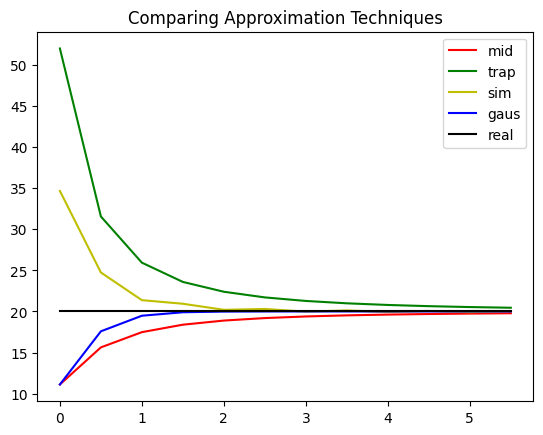

In [25]:
a = 1
b = 5
n = 13
mid_approx, trap_approx, sim_approx, gaus_approx = [], [], [], []
real_value = np.full(n - 1, 20)
for i in range(1,n):
    mid_approx.append(Midpoint(fnc, a, b , i))
    trap_approx.append(Trapezoid(fnc, a, b, i))
    sim_approx.append(Simpsons(fnc, a, b, i))
    gaus_approx.append(Gaussian(fnc, a, b, i))
    
X = np.arange(0,6,.5)

plt.plot(X, mid_approx, color='r', label='mid')
plt.plot(X, trap_approx, color='g', label='trap')
plt.plot(X, sim_approx, color='y', label='sim')
plt.plot(X, gaus_approx, color='b', label='gaus')
plt.plot(X, real_value, color='k', label='real')

plt.title("Comparing Approximation Techniques")
plt.legend()
plt.show()



<p>The graph illustrates how each technique converges toward the exact value of 20 as n increases.</p>